In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('bang_square1.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'error', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.head()

,time_s,goal_deg,true_deg,error,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.014976,113.0,-0.022342,113.028252,113.0,0.25,1.0,255.75,0.0
1,0.015476,113.0,-0.028252,113.035326,113.0,0.25,1.0,255.75,0.0
2,0.015976,113.0,-0.035326,113.043634,113.0,0.25,1.0,255.75,0.0
3,0.016476,113.0,-0.043634,113.052855,113.0,0.25,1.0,255.75,0.0
4,0.016976,113.0,-0.052855,113.062706,113.0,0.25,1.0,255.75,0.0


<Axes: xlabel='time_s'>

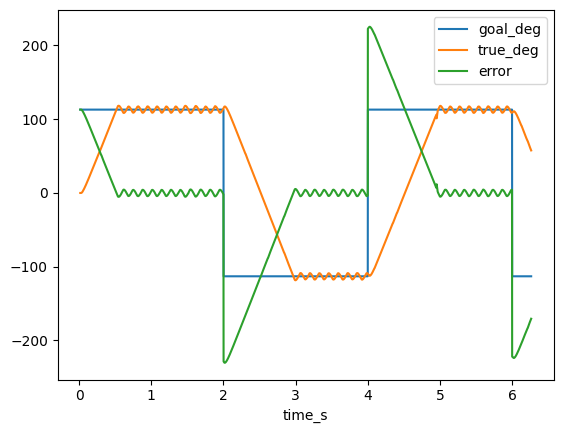

In [149]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: xlabel='time_s'>

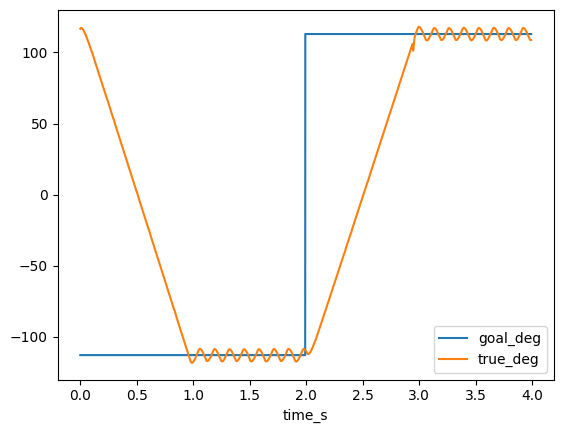

In [150]:
# Isolate one cycle
df = df[df['time_s'] > 2.01]
df = df[df['time_s'] < 6.0]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'])

In [151]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \nstd: {std_error} \nrms: {rms_error}')

mean: 59.10742283343913 
std: 95.55964450348849 
rms: 95.56089288561019


In [152]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \nstd: {command_std} \nrms: {rms_command}')

mean: 255.75 
std: 255.7423311518724 
rms: 255.75


In [153]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = ((max/df['goal_deg'].max())-1)*100
print(overshoot, pc_overshoot)

5.098560000000006 4.512000000000005


In [154]:
# Rise and settling time
rise = 0.86749 # seconds
# Settle not applicable

### 0.25 effort
error

mean: 0.4884582499682652 

std: 95.55964450348849 

rms: 95.56089288561019


command:

mean: 1.9805446235876603

std: 255.7423311518724 

rms: 255.75

OS & %OS
5.098560000000006 1.04512

rise = 0.86749 # seconds

Settle not applicable

### 0.5 effort

error:

mean: 3.735406037935879 

std: 71.57659837884795

rms: 71.67400291427252

command:

mean: 3.7240388299910587 

std: 511.4864431583624 

rms: 511.5

OS & % OS 13.224041 11.702691150442469

rise = 0.433559 # seconds

Settle not applicable

### 1 effort

error

mean: -8.028924742944316 

std: 73.73602633623695 

rms: 74.17186267302509

command

mean: 1.820747520976354 

std: 1022.9983797047115 

rms: 1023.0

OS & % OS 69.682973 61.66634778761062

rise = 0.336492 # seconds

settle not applicable